In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
import gzip
import io
from astropy.io import fits

np.random.seed(1)

In [2]:
test_images = pd.read_pickle("plots/test_images.pkl")
print(test_images["images"].shape)
print(test_images["labels"].shape)

(250, 21, 21, 3)
(250,)


In [3]:
data_path = os.path.join("../../pickles", "training_set_Nov-26-2019.pkl")
training_set = pd.read_pickle(data_path)

In [4]:
training_set

,class,oid,cutoutScience,cutoutTemplate,cutoutDifference,sgscore1,distpsnr1,sgscore2,distpsnr2,sgscore3,distpsnr3,isdiffpos
0,SN,ZTF18acqyvag,b'\x1f\x8b\x08\x00\xc2Q\xf5[\x02\x03\xed\xbbW\...,b'\x1f\x8b\x08\x00\xc2Q\xf5[\x02\x03\xed\x9bU\...,b'\x1f\x8b\x08\x00\xc2Q\xf5[\x02\x03\xed\xb7iX...,0.000833,13.407900,0.005042,20.248602,0.079559,22.417665,t
1,SN,ZTF19aarphwc,b'\x1f\x8b\x08\x00X\xc7\xca\\\x02\x03\xed\xbaU...,b'\x1f\x8b\x08\x00X\xc7\xca\\\x02\x03\xed\x9bU...,b'\x1f\x8b\x08\x00X\xc7\xca\\\x02\x03\xed\xb7i...,0.761167,14.532326,0.990107,15.556331,0.567958,19.342962,t
2,SN,ZTF18acenqto,b'\x1f\x8b\x08\x00\x86\xf8\xe3[\x02\x03\xed\x9...,b'\x1f\x8b\x08\x00\x86\xf8\xe3[\x02\x03\xed\xb...,b'\x1f\x8b\x08\x00\x86\xf8\xe3[\x02\x03\xed\xb...,0.015167,4.934814,0.982083,20.565067,0.989375,23.472559,t
3,SN,ZTF18acxgqxq,b'\x1f\x8b\x08\x00\xbb\x0b\x17\\\x02\x03\xed\x...,b'\x1f\x8b\x08\x00\xbb\x0b\x17\\\x02\x03\xed\x...,b'\x1f\x8b\x08\x00\xba\x0b\x17\\\x02\x03\xed\x...,0.987042,7.957039,0.994833,13.217311,0.956458,13.472185,t
4,SN,ZTF18abshezu,b'\x1f\x8b\x08\x00\xc2\xb8\x8b[\x02\x03\xed\xb...,b'\x1f\x8b\x08\x00\xc2\xb8\x8b[\x02\x03\xed\x9...,b'\x1f\x8b\x08\x00\xc2\xb8\x8b[\x02\x03\xed\xb...,0.004792,24.373383,0.966643,25.371384,-999.000000,-999.000000,t
...,...,...,...,...,...,...,...,...,...,...,...,...
36257,bogus,ZTF19abyseqt,b'\x1f\x8b\x08\x008]{]\x02\x03\xed\x9byt\x93\x...,b'\x1f\x8b\x08\x008]{]\x02\x03\xed\x9bU\x94UW\...,b'\x1f\x8b\x08\x008]{]\x02\x03\xed\xb7Y8\x97o\...,0.020708,4.604470,0.025458,9.883908,0.500000,17.766672,t
36258,bogus,ZTF19abyshbe,b'\x1f\x8b\x08\x00\xcb^{]\x02\x03\xed\xba\x7fX...,b'\x1f\x8b\x08\x00\xcb^{]\x02\x03\xed\xbbUtUg\...,b'\x1f\x8b\x08\x00\xcb^{]\x02\x03\xed\xb7YX\x8...,0.974583,1.940111,0.023792,12.112996,0.500000,12.171598,t
36259,bogus,ZTF19abysicz,b'\x1f\x8b\x08\x00\xcc_{]\x02\x03\xed\xbamX\x9...,b'\x1f\x8b\x08\x00\xcc_{]\x02\x03\xed\xbbetUw\...,b'\x1f\x8b\x08\x00\xcc_{]\x02\x03\xed\xb7YX\x8...,0.846423,1.999908,0.973125,2.968323,0.154833,18.967863,t
36260,bogus,ZTF19abytqsv,b'\x1f\x8b\x08\x00\xa5w{]\x02\x03\xed\x9a}x\xc...,b'\x1f\x8b\x08\x00\xa5w{]\x02\x03\xed\xbbUtTY\...,b'\x1f\x8b\x08\x00\xa5w{]\x02\x03\xed\xb7iX\x8...,0.893369,1.636938,0.003333,8.074464,1.000000,13.374747,f


In [5]:
def get_image_from_bytes_stamp(stamp_byte):
    with gzip.open(io.BytesIO(stamp_byte), "rb") as f:
        with fits.open(io.BytesIO(f.read())) as hdul:
            img = hdul[0].data
    return img


def take_random_samples(data, n=30, class_index=None, normalize=True):
    classes, inverse = np.unique(data["class"], return_inverse=True)
    image_key = ["cutoutScience", "cutoutTemplate", "cutoutDifference"]
    images = {}
    if class_index is None:
        for i, c in enumerate(classes):
            list_of_images = []
            indexes = np.random.choice(np.where(inverse == i)[0], size=n, replace=False)
            print(indexes)
            for index in indexes:
                image_dict = {}
                for key in image_key:
                    image_dict[key] = get_image_from_bytes_stamp(data.iloc[index][key])
                    if normalize:
                        image_dict[key] = (
                            image_dict[key] - np.nanmean(image_dict[key])
                        ) / np.nanstd(image_dict[key])
                list_of_images.append(image_dict)
            images[c] = list_of_images
    return images

In [6]:
images = take_random_samples(training_set)
images

[ 7272  1960 10105  7710  3991  8337  8893  3485  1357  1992  2183  4914
  8024  3455  2843  6021  3754 10067 10347  8801  5365  1883  3172  7901
  1353  7541 10100  5199  9726  2249]
[ 601  456 1040  846  638  634  624  868  119  185  933  546  262  974
 1060  363  664  940  578  501  607  984  322   49   71  105  958 1009
   31  538]
[16117 11406 15297 13075 17384 18209 19177 14027 11544 17333 14280 20458
 11386 17086 19799 13127 14582 16169 18277 17952 19965 16910 12170 14046
 19202 12249 12807 16086 20966 20856]
[21822 30860 22893 25549 27476 28490 27733 21461 24308 23080 29459 30628
 28043 28162 25868 30263 21872 27945 24345 23076 26824 23547 28418 23586
 22610 26728 24338 27841 25470 27802]
[35952 36187 34310 33034 31888 35767 32503 31549 32716 33570 34843 32468
 31548 33807 33204 32747 35908 33350 36098 34367 34701 31105 34219 33442
 33582 35484 36258 33913 33375 32018]


/home/rcarrasco/anaconda3/envs/tf1/lib/python3.7/site-packages/numpy/core/fromnumeric.py:90: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/home/rcarrasco/anaconda3/envs/tf1/lib/python3.7/site-packages/ipykernel_launcher.py:21: RuntimeWarning: invalid value encountered in true_divide


{'AGN': [{'cutoutScience': array([[ 0.03886477, -0.02594345, -0.0715269 , ...,  0.04703123,
            0.0521744 , -0.18818809],
          [ 0.03278682, -0.12960076, -0.10751082, ..., -0.0339312 ,
           -0.03566602, -0.07531749],
          [-0.05466949, -0.10038277, -0.01409681, ..., -0.05096826,
            0.04114019, -0.01427225],
          ...,
          [-0.04267407, -0.01440302, -0.16398835, ..., -0.01301839,
           -0.01838543,  0.03502926],
          [-0.00732643,  0.05627588,  0.06508121, ..., -0.04573901,
            0.0015947 , -0.06821633],
          [-0.10951606, -0.10824256, -0.09811576, ..., -0.08190867,
           -0.1169377 , -0.18563546]], dtype=float32),
   'cutoutTemplate': array([[-0.07242571, -0.07627327, -0.07802818, ..., -0.0834582 ,
           -0.0720234 , -0.10286404],
          [-0.04793531, -0.06268816, -0.11201084, ..., -0.05714418,
           -0.04958813, -0.09451994],
          [-0.07950412, -0.08528871, -0.07469026, ..., -0.08919919,
          

/home/rcarrasco/anaconda3/envs/tf1/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: All-NaN slice encountered
  # This is added back by InteractiveShellApp.init_path()


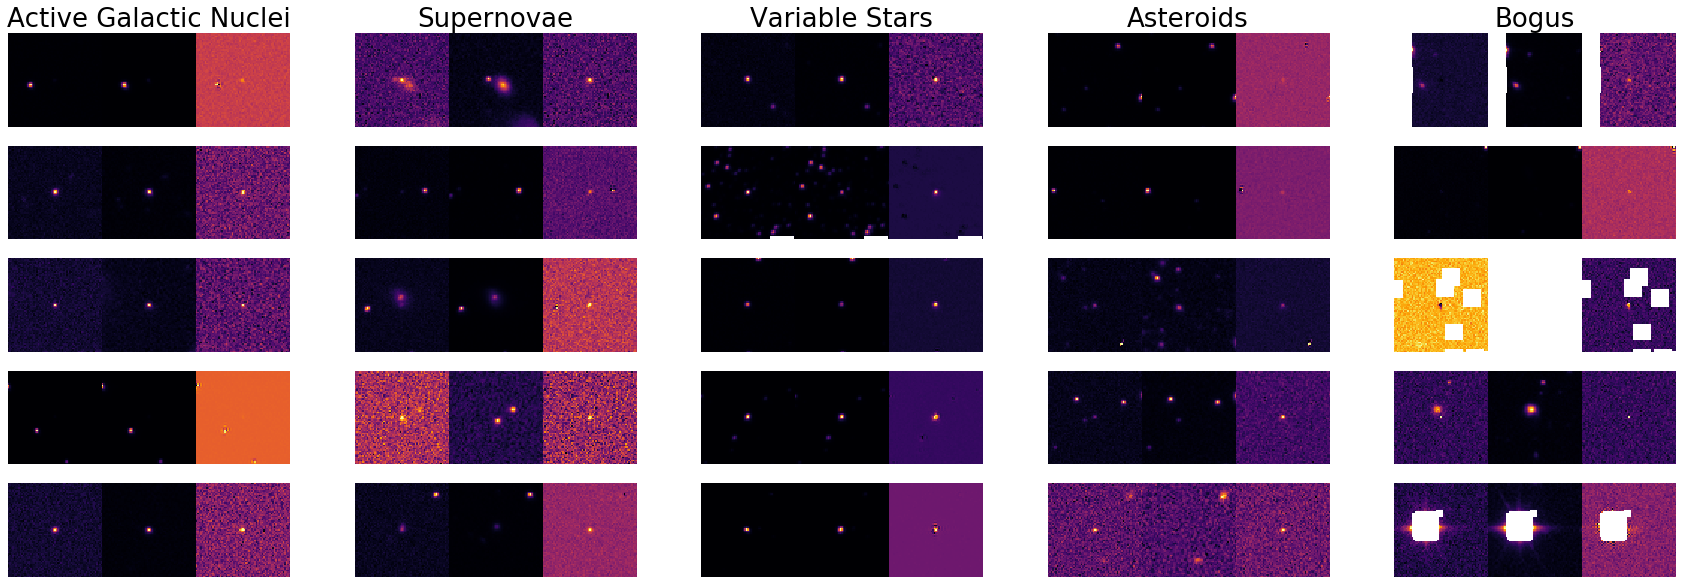

In [7]:
f, ax = plt.subplots(5, 5, figsize=(30, 10))
class_names = [
    "Active Galactic Nuclei",
    "Supernovae",
    "Variable Stars",
    "Asteroids",
    "Bogus",
]
for i, (c, im_list) in enumerate(images.items()):
    class_image = []
    images_list = im_list[:5]
    if c == "bogus":
        images_list = im_list[-5:]
    for j, im in enumerate(images_list):
        sample_image = []
        for im_key, im_values in im.items():
            image = (im_values - np.nanmin(im_values)) / (
                np.nanmax(im_values) - np.nanmin(im_values)
            )
            sample_image.append(image)
            # print(np.nanmax(image), np.nanmin(image))
        sample_image = np.concatenate(sample_image, axis=1)
        class_image.append(sample_image)
        ax[j, i].imshow(
            sample_image, cmap="inferno", vmin=0, vmax=1
        )  # vmin=-2.8, vmax=2.8, cmap="inferno")
        ax[j, i].set_axis_off()
    class_image = np.concatenate(class_image, axis=0)
    # ax[i].imshow(class_image)
    ax[0, i].set_title(class_names[i], fontsize=26)

plt.savefig("plots/samples_per_class.pdf", bbox_inches="tight")
plt.show()

/home/rcarrasco/anaconda3/envs/tf1/lib/python3.7/site-packages/ipykernel_launcher.py:21: RuntimeWarning: divide by zero encountered in log
/home/rcarrasco/anaconda3/envs/tf1/lib/python3.7/site-packages/ipykernel_launcher.py:22: RuntimeWarning: divide by zero encountered in log


-inf
-inf
-inf
-inf
-inf
-inf
-inf
-inf
-inf
-inf
-inf
-inf
-inf
-inf
-inf


/home/rcarrasco/anaconda3/envs/tf1/lib/python3.7/site-packages/ipykernel_launcher.py:14: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  


-inf
-inf
-inf
-inf
-inf
-inf
-inf
-inf
-inf
-inf
-inf
-inf
-inf
-inf
-inf
-inf
-inf
-inf
nan
nan
nan
-inf
-inf
-inf
-inf
-inf
-inf
-inf
-inf
-inf
-inf
-inf
-inf
-inf
-inf
-inf
-inf
-inf
-inf
-inf
-inf
-inf
-inf
-inf
-inf
nan
nan
nan
-inf
-inf
-inf
nan
nan
nan
-inf
-inf
-inf
nan
nan
nan


/home/rcarrasco/anaconda3/envs/tf1/lib/python3.7/site-packages/ipykernel_launcher.py:19: RuntimeWarning: All-NaN slice encountered
/home/rcarrasco/anaconda3/envs/tf1/lib/python3.7/site-packages/matplotlib/image.py:397: UserWarning: Warning: converting a masked element to nan.
  dv = (np.float64(self.norm.vmax) -
/home/rcarrasco/anaconda3/envs/tf1/lib/python3.7/site-packages/matplotlib/image.py:398: UserWarning: Warning: converting a masked element to nan.
  np.float64(self.norm.vmin))
/home/rcarrasco/anaconda3/envs/tf1/lib/python3.7/site-packages/matplotlib/image.py:405: UserWarning: Warning: converting a masked element to nan.
  a_min = np.float64(newmin)
/home/rcarrasco/anaconda3/envs/tf1/lib/python3.7/site-packages/matplotlib/image.py:410: UserWarning: Warning: converting a masked element to nan.
  a_max = np.float64(newmax)
<string>:6: UserWarning: Warning: converting a masked element to nan.
/home/rcarrasco/anaconda3/envs/tf1/lib/python3.7/site-packages/numpy/ma/core.py:711: UserW

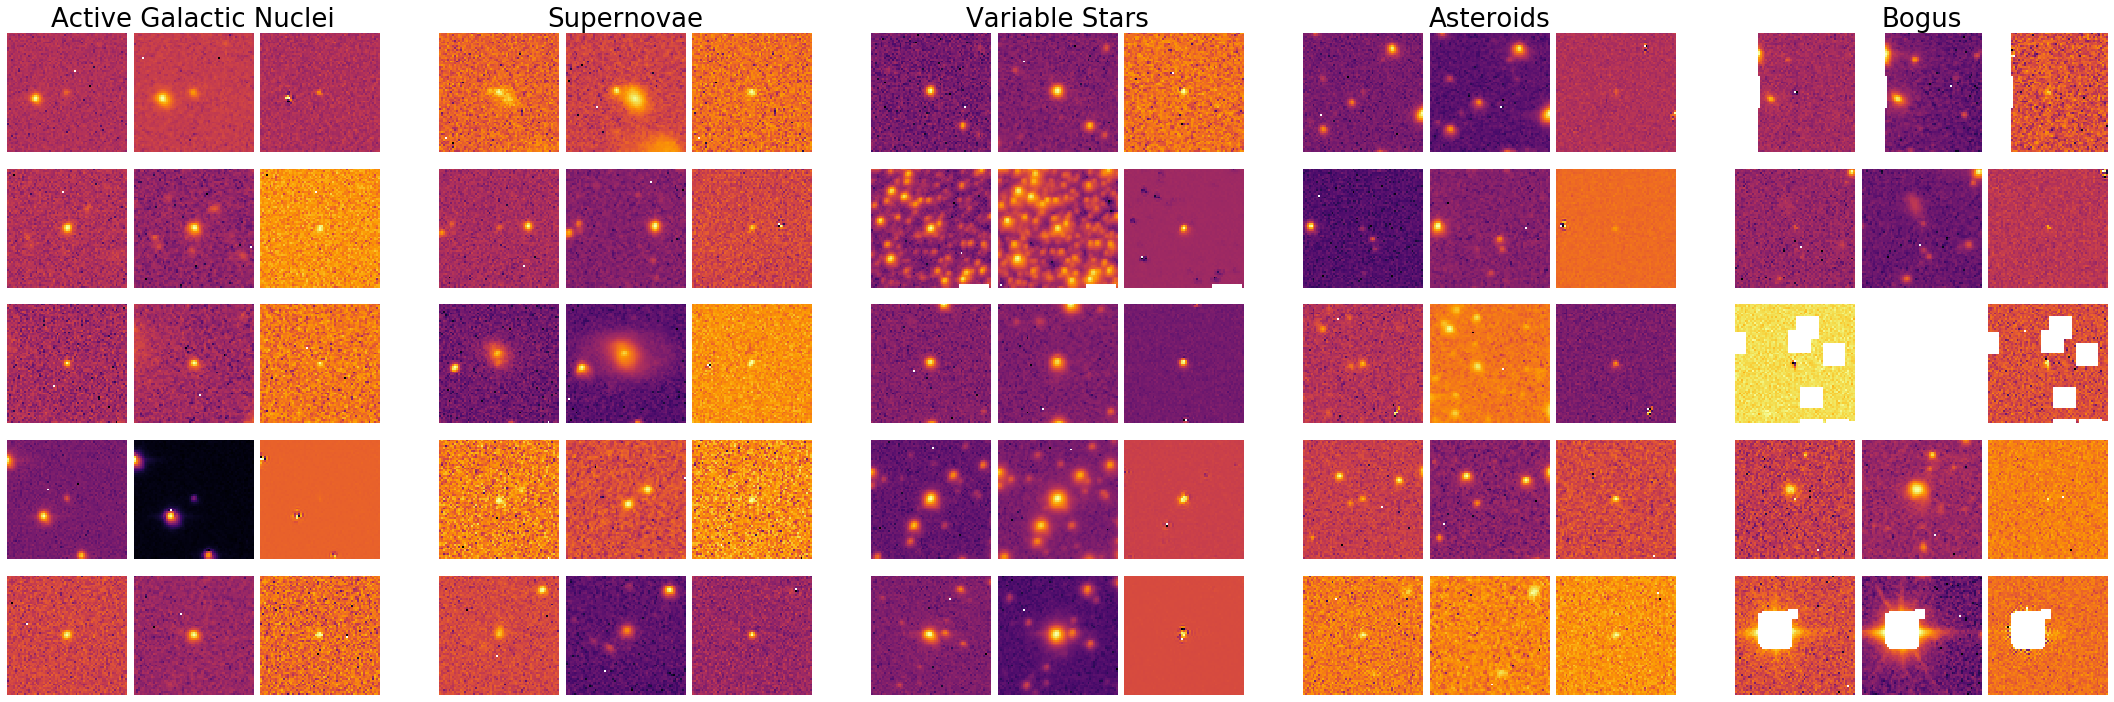

In [9]:
import matplotlib.gridspec as gridspec

fig = plt.figure(figsize=(30, 10))
class_names = [
    "Active Galactic Nuclei",
    "Supernovae",
    "Variable Stars",
    "Asteroids",
    "Bogus",
]
for i, (c, im_list) in enumerate(images.items()):
    if c == "bogus":
        im_list = im_list[-5:]
    class_image = []
    gs1 = gridspec.GridSpec(5, 3)
    ax = {}
    for row in range(5):
        for col in range(3):
            ax[row, col] = fig.add_subplot(gs1[row, col])

    gs1.tight_layout(fig, rect=[i * 0.2, 0, 0.2 * i + 0.1995, 1], h_pad=-2, w_pad=-3)

    for j, im in enumerate(im_list[:5]):
        sample_image = []
        for k, (im_key, im_values) in enumerate(im.items()):
            image = (im_values - np.nanmin(im_values)) / (
                np.nanmax(im_values) - np.nanmin(im_values)
            )
            col = i * 3 + k
            ax[j, k].imshow(np.log(image), cmap="inferno")  # , vmax=1)
            print(np.log(image).min())
            ax[j, k].set_axis_off()
            if k == 1:
                ax[0, k].set_title(class_names[i], fontsize=26)
            # print(np.nanmax(image), np.nanmin(image))
        # sample_image = np.concatenate(sample_image, axis=1)
        # class_image.append(sample_image)
        # ax[j, i].imshow(sample_image, cmap="inferno", vmin=0, vmax=1)#vmin=-2.8, vmax=2.8, cmap="inferno")
        # ax[j, i].set_axis_off()
    # class_image = np.concatenate(class_image, axis=0)
    # ax[i].imshow(class_image)


plt.savefig("plots/samples_per_class.pdf", bbox_inches="tight")
plt.show()

In [56]:
classes, inverse = np.unique(training_set["class"], return_inverse=True)
print(inverse)
print(classes)
training_set.iloc[2]["cutoutScience"]

[1 1 1 ... 4 4 4]
['AGN' 'SN' 'VS' 'asteroid' 'bogus']


b'\x1f\x8b\x08\x00\x86\xf8\xe3[\x02\x03\xed\x9bUxT\xd9\xb7\xed\xf7\xdeU\x95\x04\x0b\xda\xb8\x04i$xp\x871\xd34\x12\xd2!\x04\x1a\x824\x84\xe0\xee\x1e\xb4\x83\x07ww\xa7q\xef\xe0\xee\x10\xa4\x03\x8dC\x88U\xcak\xd7\xb6\xba\xb3\xff\xf7\xed~\xe7\xe5\x9e{\xbe\xfb\xd4\xeb\x05\x08\xc9\xae\xb5\xd6\x9cs\x8c\xdfH*]\xdaw\x8a\x8a\xf8)$\xa4EHHL\xc8\xff\xc0B\xfb\x98\xa8\xf6\xdd\xff\xf3\xbc\xffs\xd5\xac\x17\xf6\x7f\xff\xbc\xc86\xdd\xdbw\t\xf9/\x9f\x17\x12\xf2\xdf}^\xdd\xff\xfay\r\xeb\xfd7\x9f\x17\xf6?\xf7<t\x8dl\x1f\xf3\x9f\xf3V\t\x8f\xfc\xdf\x1f\xaa\xf2\xffR\x8f\x9f"\xc3C\xfe]\xff\xae\x7f\xd7\xbf\xeb\xdf\xf5\xef\xfaw\xfd\xbb\xfe]\xffs\x8b\x841\x81\xd0\xde\x1c&)\xdfF\x12\xb2\x97\xc2=c\x07d\xdbc\x12\xd3\xc7\xc1\xee\x9e\x05\xf5\x83\x19\x8e\xbf\x01w\x97\xb7P\xa68 \xdf~\t\xff\x90+$\xd4\xa9I\xe2_\xf5\x911\xee\x1dI36\x93P\xf7:\xbc\xcfv\x92e\xeb\x1ch\x95\xfa\xc2\xf6i<|\x0b\xab\x92\xb4s\x1d\x99\x8a%\x90p!\x0c\xf6\xaa\x07\xe19\xfd\x1dj\x90AB\xa5f0\x1a\xcc\'\xc9\xbc\x93\x84j\t$\x19\x87I,e\x85\xdc\xae\x06\xd2\'\xc

In [ ]:
help(np.random.choice)